In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
import pickle
%matplotlib inline
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM

In [92]:
data=pd.read_csv('nigerian.csv')
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [93]:
del data['instrumentalness']
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.0659,-6.547,0.2340,123.997,4


In [94]:
del data['energy']
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.0659,-6.547,0.2340,123.997,4


In [95]:
del data['liveness']
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,-6.547,0.2340,123.997,4


In [96]:
del data['loudness']
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.2340,123.997,4


In [97]:
del data['speechiness']
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,123.997,4


In [98]:
del data['time_signature']
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,tempo
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,133.015
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,129.993
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,130.005
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,111.087
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,105.115
...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,127.954
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,154.010
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,121.058
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,123.997


In [99]:
data.sample(20)

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,tempo
144,1er Gaou - Version originale,1er Gaou (Album original),Magic System,afropop,2012,295146,0,0.835,0.1400,119.044
420,Mind,Mind,Various Artists,afropop,2018,233848,0,0.842,0.1060,114.956
108,Pakurumo,Superstar,WizKid,afro dancehall,2011,212005,41,0.879,0.5250,119.990
279,Baby Answer,Signature - EP,Iyanya,afro dancehall,2017,202680,0,0.720,0.1140,106.022
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,130.005
21,Whoa!,Insert Project Name,AYLØ,indie r&b,2017,205395,24,0.640,0.9540,108.356
417,Nek-Unek,Collywood Music Afrobeats Kickers,Various Artists,afropop,2014,229343,0,0.766,0.0380,123.054
425,The Matter (feat. Wizkid),The Matter (feat. Wizkid),Maleek Berry,afropop,2013,198058,40,0.697,0.2240,103.070
376,Shake,Blessed,Flavour,afro dancehall,2012,236355,0,0.731,0.2620,125.043
58,Kind Love,Ayo,WizKid,afro dancehall,2014,231947,26,0.627,0.0269,119.004


In [100]:
data['label']=data['popularity']

positif=data[data['popularity']>= 51]

negatif=data[data['popularity']< 51]

Corpus=pd.concat([positif,negatif],ignore_index=True)[['label','artist']]
Corpus

,label,artist
0,55,Joeboy
1,63,DJ Neptune
2,54,Teni
3,60,Simi
4,53,Runtown
...,...,...
525,10,J. Martins
526,0,Various Artists
527,0,Iyanya
528,0,Iyanya


In [101]:
#train['label']=train['popularity'].astype(str).map({'positif':'0',"negatif":'1'})
#train['label']

In [102]:
for ind in Corpus['label'].index:
    if Corpus.loc[ind,'label'] >= 51:
        Corpus.loc[ind,'label']=1
    elif Corpus.loc[ind,'label'] < 51:
        Corpus.loc[ind,'label']=0
        

In [103]:
Corpus.label.value_counts()

0    492
1     38
Name: label, dtype: int64

In [104]:
#Nettoyage du corpus
from nltk.stem import SnowballStemmer

fr = SnowballStemmer('french')

In [105]:
# Construction de la liste des stop words french
from nltk.corpus import stopwords
from stop_words import get_stop_words
import nltk

nltk.download('stopwords')
my_stop_word_list = get_stop_words('french')
final_stopwords_list = stopwords.words('french')

s_w=list(set(final_stopwords_list+my_stop_word_list))
s_w=[elem.lower() for elem in s_w]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
from nltk.corpus import stopwords
from stop_words import get_stop_words
import nltk

nltk.download('stopwords')
my_stop_word_list = get_stop_words('french')
final_stopwords_list = stopwords.words('french')

s_w=list(set(final_stopwords_list+my_stop_word_list))
s_w=[elem.lower() for elem in s_w]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
!pip install stop-words

In [108]:
s_w

['étiez',
 'j',
 'ce',
 'même',
 'ils',
 'étions',
 'ou',
 'fois',
 'toi',
 'juste',
 'tels',
 'leur',
 'personne',
 'voient',
 'ton',
 'aurait',
 'mon',
 'aurai',
 'très',
 'étant',
 'c',
 'aurons',
 'eu',
 'on',
 'étaient',
 'leurs',
 'nom',
 'force',
 'nouveau',
 'des',
 'où',
 'ayez',
 'dos',
 'avons',
 'du',
 'vu',
 'tu',
 'fut',
 'eût',
 'serions',
 'nommés',
 'personnes',
 'auront',
 'ceux',
 'dù',
 'cela',
 'ceci',
 'nouveaux',
 'dehors',
 'suis',
 'serez',
 'eus',
 'là',
 'tandis',
 'fûtes',
 'ci',
 'alors',
 'eurent',
 'sans',
 'étais',
 'aurez',
 'vous',
 'comment',
 'à',
 'dedans',
 'pas',
 'auraient',
 'fusses',
 'début',
 'mot',
 'dès',
 'son',
 'ni',
 'parce',
 'fût',
 'ayantes',
 'avec',
 'te',
 'sa',
 'seulement',
 'nommée',
 'aies',
 'aux',
 'aucun',
 'elles',
 'ayants',
 'quel',
 'serai',
 'donc',
 'étantes',
 'devoir',
 'ai',
 'un',
 'eue',
 'eûtes',
 'notre',
 'fussiez',
 'étées',
 'avez',
 'été',
 'sois',
 'es',
 'seras',
 't',
 'il',
 'furent',
 'ayons',
 'était'

In [109]:
!pip install Unidecode

In [110]:
import re
from unidecode import unidecode

def nettoyage(string):
    l=[]
    string=unidecode(string.lower())
    string=" ".join(re.findall("[a-zA-Z]+", string))
    
    for word in string.split():
            l.append(fr.stem(word))
    return ' '.join(l)

nettoyage(Corpus['artist'].loc[0])

'joeboy'

In [111]:
#Je nettoie la colonne entiere
Corpus['artist_net']=Corpus['artist'].apply(nettoyage)

In [112]:
# Featuriser et numeriser grâce à TF-IDF les textes
vectorizer = TfidfVectorizer()
vectorizer.fit(Corpus['artist_net'])
X=vectorizer.transform(Corpus['artist_net'])
print(vectorizer.get_feature_names())

#Save vectorizer.vocabulary_
pickle.dump(vectorizer.vocabulary_,open("feature.pkl","wb"))


['abag', 'abani', 'abdulkareem', 'ad', 'adekunl', 'afric', 'afro', 'agulu', 'ajas', 'alad', 'all', 'amaara', 'amad', 'anderson', 'anyidon', 'artist', 'awilo', 'aylo', 'bab', 'bac', 'bank', 'banky', 'basketmouth', 'be', 'beatz', 'bello', 'berry', 'bez', 'bis', 'blackmagic', 'blaq', 'bm', 'bobson', 'boj', 'boy', 'bracket', 'brymo', 'burn', 'cdq', 'chidinm', 'chidokeyz', 'chik', 'classic', 'coal', 'collect', 'cruel', 'cynthi', 'dammy', 'daniel', 'davido', 'dj', 'dmw', 'donl', 'dr', 'drb', 'drill', 'duncan', 'eazi', 'eazzy', 'eedr', 'eff', 'elde', 'engin', 'essenc', 'eugen', 'eugy', 'fally', 'falz', 'family', 'famous', 'flav', 'flavour', 'galaxy', 'gold', 'harrysong', 'henry', 'hit', 'humblesmith', 'ice', 'ikechukwu', 'illbliss', 'ipup', 'is', 'iwar', 'iyani', 'jay', 'jilex', 'joeboy', 'johnny', 'jul', 'julz', 'jungl', 'kas', 'kayswitch', 'kce', 'kdei', 'kesh', 'kg', 'kid', 'kiss', 'kizz', 'kok', 'kored', 'kraft', 'kran', 'kuam', 'kwamz', 'lady', 'lasgid', 'legendury', 'lil', 'longomb', 'l

In [113]:
print(len(vectorizer.get_feature_names()))

226


In [114]:
y=Corpus['label']
y

0      1
1      1
2      1
3      1
4      1
      ..
525    0
526    0
527    0
528    0
529    0
Name: label, Length: 530, dtype: int64

In [115]:
X
#Entrainement
X.shape

(530, 226)

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [119]:
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression(max_iter=300).fit(x_train,y_train)

print(cls.score(x_val,y_val))
pickle.dump(cls,open("cls.pkl","wb"))

0.9528301886792453


In [120]:
#Prédiction
artist='joeboy'

user=vectorizer.transform([nettoyage(artist)])

cls.predict_proba(user), cls.predict(user)


(array([[0.86578943, 0.13421057]]), array([0], dtype=int64))

In [ ]:
route='/result'
url='http://127.0.0.1:5000'+route

param={'input_text':'Il est fort cet artsiste'}
r=requests.post(url,data=param)
r.json()


In [123]:
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,tempo,label
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,133.015,48
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,129.993,30
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,130.005,40
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,111.087,14
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,105.115,25
...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,127.954,10
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,154.010,0
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,121.058,0
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,123.997,0


KeyError: 1.0

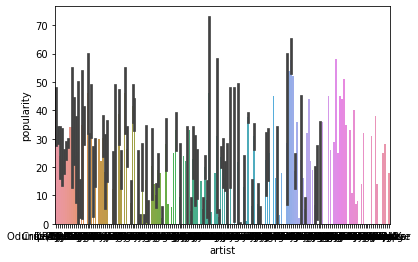

In [130]:
sns.barplot(x="artist", y="popularity", data=train)

print("Percentage de femme ayant survécu:", train["popularity"][train["artist"]].value_counts(normalize = True)[1]*100)

print("Percentage de homme ayant survécu:", train["popularity"][train["artist"] ].value_counts(normalize = True)[1]*100)

In [132]:
import requests

In [133]:
route='/prediction'
url='http://127.0.0.1:5000'+route

param={'input_text':"c'est un artiste populaire"}
r1=requests.post(url,data=param)
r1.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)